## **Normalization using Tensorflow Keras**
In this scenario of hackerrank, you will be exploring about the **Normalization** and how to use it.  

We will look at three scenarios here
1. Without Normalization, 
2. Applying Normalization before Activation Function
3. Applying Normalization after Activation Function

**Note** - Finally restart and run all the cells after the completion of the challenge


### Run the below cell to import the neccessary packages

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from keras.layers import BatchNormalization
from keras.models import model_from_json
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
import random as rn
from keras import backend as K
import matplotlib.pyplot as plt
import os
from keras.layers import Activation

Using TensorFlow backend.


### Run the below cells so as to get the reproducibility of the results

In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
sd = 22 # Here sd means seed.
np.random.seed(sd)
rn.seed(sd)
os.environ['PYTHONHASHSEED']=str(sd)

config = tf.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.set_random_seed(sd)
sess = tf.Session(graph=tf.get_default_graph(), config=config)
K.set_session(sess)

### Load the dataset 
 - Load the breast cancer dataset using load_breast_cancer function

In [4]:
X, y = load_breast_cancer().data, load_breast_cancer().target

### Split the Dataset
- Split the data with the train_test_split function of sklearn with parameters test_size=0.2 and random_state=500

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 500)


---------------------------------------------------------------------------
## **1.Without Normalization**
-------------------------------------------------------------------

### Create Model

Construct a fully-connected network structure defined using dense class
- Create a sequential model
- The model expects rows of data with 30 variables (the input_dim=30 argument)
- The first hidden layer has 90 nodes and uses the relu activation function.
- The second hidden layer has 60 nodes and uses the relu activation function.
- The third hidden layer has 30 nodes and uses the relu activation function.
- The output layer has 1 node and uses the sigmoid activation function.
- While comipling the model pass the following parameters -
                    
           -optimizer as Adagrad
           -loss as binary cross entropy 
           -metrics as accuracy

In [6]:
model = Sequential()
model.add(Dense(30, input_dim = 30))
model.add(Dense(90, activation = "relu"))
model.add(Dense(60, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", 
             optimizer = "Adagrad", 
             metrics = ["accuracy"])





Instructions for updating:
Colocations handled automatically by placer.


### Fit the model
- fit the model with X_train, y_train, epochs=50, batch_size=50,shuffle=False,validation_split=0.2,verbose=1 and save it in history

In [7]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 50, 
                   shuffle = False, validation_split=0.2,verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 0s 497us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 2/50
364/364 [==============================] - 0s 34us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 3/50
364/364 [==============================] - 0s 32us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 4/50
364/364 [==============================] - 0s 33us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 5/50
364/364 [==============================] - 0s 33us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 6/50
364/364 [==============================] - 0s 34us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 7/50
364/364 [============================

### Evaluate the model
- Evaluate the model with training data using X_train and y_train and give verbose as 0 and save it in train_acc

- In the similar way evaluate the model with test data using X_test and y_test using verbose as 0 and save it in test_acc

In [8]:
_, train_acc = model.evaluate(X_train, y_train, verbose = 0)
_,test_acc= model.evaluate(X_test, y_test, verbose = 0)
print('Train: %.2f, Test: %.2f' % (train_acc, test_acc))


Train: 0.61, Test: 0.69


### Run the below cell to look at the performance of the model

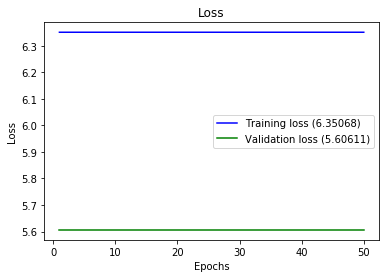

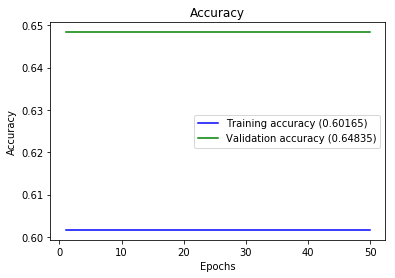

In [9]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
# Calling the function
plot_history(history)

---------------------------------------------------------------------------
## **2.Applying Normalization before Activation Function**
-------------------------------------------------------------------

### Create Model

Construct a fully-connected network structure defined using dense class
- Create a sequential model1
- The model1 expects rows of data with 30 variables (the input_dim=30 argument)
- The first hidden layer has 90 nodes.
- Add Batch Normalization using BatchNormalization function to the model1.
- Add the activation function as relu
- The second hidden layer has 60 nodes.
- Add Batch Normalization using BatchNormalization function to the model1.
- Add the activation function as relu
- The third hidden layer has 30 nodes.
- Add Batch Normalization using BatchNormalization function to the model1.
- Add the activation function as relu
- The output layer has 1 node and uses the sigmoid activation function.
- While comipling the model1 pass the following parameters -
                    
           -optimizer as Adagrad
           -loss as binary cross entropy 
           -metrics as accuracy

In [10]:
model1 = Sequential()
model1.add(Dense(30, input_dim = 30))

model1.add(Dense(90))
model1.add(BatchNormalization())
model1.add(Activation("relu"))

model1.add(Dense(60))
model1.add(BatchNormalization())
model1.add(Activation("relu"))

model1.add(Dense(30))
model1.add(BatchNormalization())
model1.add(Activation("relu"))   

model1.add(Dense(1, activation = "sigmoid"))

model1.compile(loss = "binary_crossentropy", 
             optimizer = "Adagrad", 
             metrics = ["accuracy"])





### Fit the model
- fit the model1 with X_train, y_train, epochs=50, batch_size=50,shuffle=False,validation_split=0.2,verbose=1 and save it in history1

In [11]:
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=50,shuffle=False,validation_split=0.2,verbose=1)


Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 1s 1ms/step - loss: 0.3780 - accuracy: 0.8297 - val_loss: 4.3256 - val_accuracy: 0.3516
Epoch 2/50
364/364 [==============================] - 0s 54us/step - loss: 0.2258 - accuracy: 0.9286 - val_loss: 2.1805 - val_accuracy: 0.3516
Epoch 3/50
364/364 [==============================] - 0s 51us/step - loss: 0.2033 - accuracy: 0.9286 - val_loss: 1.8128 - val_accuracy: 0.3516
Epoch 4/50
364/364 [==============================] - 0s 49us/step - loss: 0.1801 - accuracy: 0.9313 - val_loss: 1.3467 - val_accuracy: 0.3626
Epoch 5/50
364/364 [==============================] - 0s 52us/step - loss: 0.1646 - accuracy: 0.9423 - val_loss: 1.0098 - val_accuracy: 0.4066
Epoch 6/50
364/364 [==============================] - 0s 55us/step - loss: 0.1534 - accuracy: 0.9396 - val_loss: 0.8585 - val_accuracy: 0.4066
Epoch 7/50
364/364 [==============================] - 0s 56us/step - loss: 0.1443 - accuracy: 0.95

### Evaluate the model
- Evaluate the model1 with training data using X_train and y_train and give verbose as 0 and save it in train_acc1

- In the similar way evaluate the model1 with test data using X_test and y_test using verbose as 0 and save it in test_acc1

In [12]:
_, train_acc1 = model1.evaluate(X_train, y_train, verbose = 0)
_,test_acc1= model1.evaluate(X_test, y_test, verbose = 0)
print('Train: %.2f, Test: %.2f' % (train_acc1, test_acc1))


Train: 0.94, Test: 0.96


### Run the below cell to look at the performance of the model1

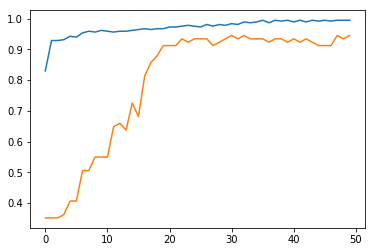

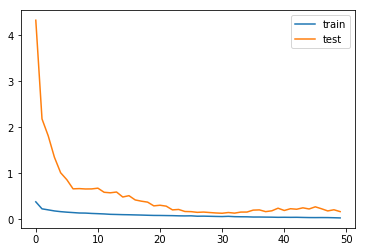

In [13]:
plt.figure(1)
pyplot.plot(history1.history['accuracy'], label='train')
pyplot.plot(history1.history['val_accuracy'], label='test')

plt.figure(2)
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

---------------------------------------------------------------------------
## **3.Applying Normalization after Activation Function**
-------------------------------------------------------------------

### Create Model

Construct a fully-connected network structure defined using dense class
- Create a sequential model2
- The model2 expects rows of data with 30 variables (the input_dim=30 argument)
- The first hidden layer has 90 nodes and uses the relu activation function.
- Add Batch Normalization using BatchNormalization function to the model2.
- The second hidden layer has 60 nodes and uses the relu activation function.
- Add Batch Normalization using BatchNormalization function to the model2.
- The third hidden layer has 30 nodes and uses the relu activation function.
- Add Batch Normalization using BatchNormalization function to the model2.
- The output layer has 1 node and uses the sigmoid activation function.
- While comipling the model2 pass the following parameters -
                    
           -optimizer as Adagrad
           -loss as binary cross entropy 
           -metrics as accuracy

In [14]:
model2 = Sequential()
model2.add(Dense(30, input_dim = 30))
model2.add(Dense(90, activation = "relu"))
model1.add(BatchNormalization())

model2.add(Dense(60, activation = "relu"))
model1.add(BatchNormalization())

model2.add(Dense(30, activation = "relu"))
model1.add(BatchNormalization())

model2.add(Dense(1, activation = "sigmoid"))

model2.compile(loss = "binary_crossentropy", 
             optimizer = "Adagrad", 
             metrics = ["accuracy"])





### Fit the model
- fit the model2 with X_train, y_train, epochs=50, batch_size=50,shuffle=False,validation_split=0.2,verbose=1 and save it in history2

In [15]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=50,shuffle=False,validation_split=0.2,verbose=1)


Train on 364 samples, validate on 91 samples
Epoch 1/50
364/364 [==============================] - 0s 628us/step - loss: 8.2360 - accuracy: 0.4863 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 2/50
364/364 [==============================] - 0s 33us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 3/50
364/364 [==============================] - 0s 34us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 4/50
364/364 [==============================] - 0s 36us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 5/50
364/364 [==============================] - 0s 35us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 6/50
364/364 [==============================] - 0s 35us/step - loss: 6.3507 - accuracy: 0.6016 - val_loss: 5.6061 - val_accuracy: 0.6484
Epoch 7/50
364/364 [==============================] - 0s 36us/step - loss: 6.3507 - accuracy: 0.

### Evaluate the model
- Evaluate the model2 with training data using X_train and y_train and give verbose as 0 and save it in train_acc2

- In the similar way evaluate the model2 with test data using X_test and y_test using verbose as 0 and save it in test_acc2

In [16]:
_, train_acc2 = model2.evaluate(X_train, y_train, verbose = 0)
_,test_acc2= model2.evaluate(X_test, y_test, verbose = 0)
print('Train: %.2f, Test: %.2f' % (train_acc2, test_acc2))


Train: 0.61, Test: 0.69


### Run the below cell to look at the performance of the model2

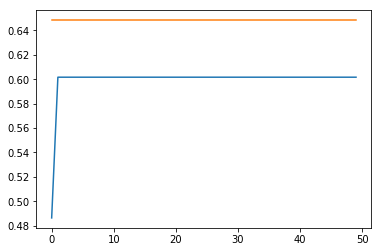

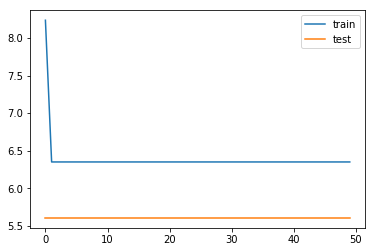

In [17]:
plt.figure(1)
pyplot.plot(history2.history['accuracy'], label='train')
pyplot.plot(history2.history['val_accuracy'], label='test')

plt.figure(2)
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Run the below cell to plot the results

<Figure size 432x288 with 0 Axes>

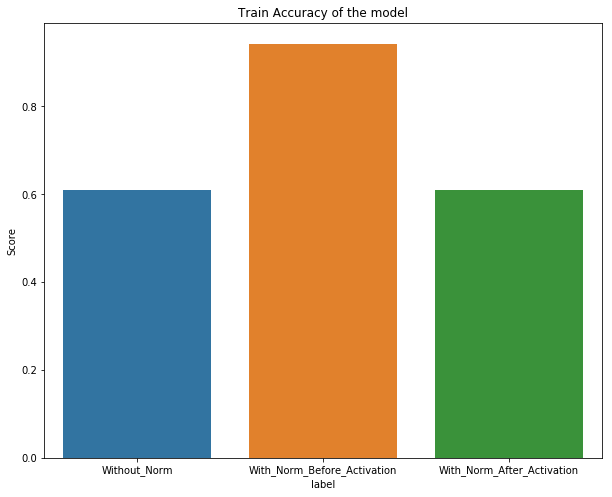

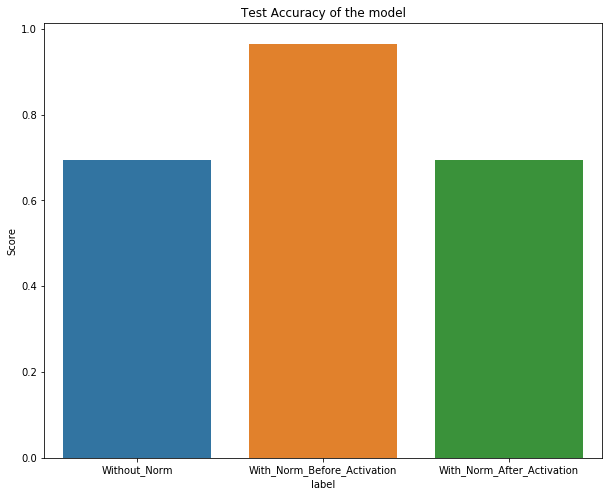

In [18]:
train_list=[train_acc,train_acc1,train_acc2]
test_list=[test_acc,test_acc1,test_acc2]

df=pd.DataFrame(train_list)

df["test_acc"]=test_list

df=df.rename(columns={0:"train_acc"})

df["label"]=["Without_Norm","With_Norm_Before_Activation","With_Norm_After_Activation"]
plt.figure(1)
pyplot.figure(figsize=(10,8))
#pyplot.xticks(grid_result1.cv_results_['mean_test_score'])
pyplot.title("Train Accuracy of the model")
plot1=sns.barplot(df["label"],df["train_acc"],order=df["label"])
plot1.set(ylabel='Score')
plt.figure(2)
pyplot.figure(figsize=(10,8))
#pyplot.xticks(grid_result1.cv_results_['mean_test_score'])
pyplot.title("Test Accuracy of the model")
plot2=sns.barplot(df["label"],df["test_acc"],order=df["label"])
plot2.set(ylabel='Score')
pyplot.show() 

### Run the below cell to save the models

In [19]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

# serialize model to JSON
model_json1 = model1.to_json()
with open("model1.json", "w") as json_file1:
    json_file1.write(model_json1)
# serialize weights to HDF5
model1.save_weights("model1.h5")

# serialize model to JSON
model_json2 = model2.to_json()
with open("model2.json", "w") as json_file2:
    json_file2.write(model_json2)
# serialize weights to HDF5
model2.save_weights("model2.h5")

### Run the below cell to save the scores 

In [20]:
with open("train_acc1.txt","w") as f:
    f.write(str(round(train_acc,2)))
with open("test_acc1.txt","w") as f:
    f.write(str(round(test_acc,2)))

with open("train_acc2.txt","w") as f:
    f.write(str(round(train_acc1,2)))
with open("test_acc2.txt","w") as f:
    f.write(str(round(test_acc1,2)))
    
with open("train_acc3.txt","w") as f:
    f.write(str(round(train_acc2,2)))
with open("test_acc3.txt","w") as f:
    f.write(str(round(test_acc2,2)))
        